In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File Upload
df = pd.read_csv("C:/Users/Lioha/Desktop/project3/marketing_and_product_performance.csv")
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [3]:
# Checking for missing values and duplicates
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64
Duplicates: 0


In [4]:
# Add new metrics
df['ROAS'] = df['Revenue_Generated'] / df['Budget']
df['Revenue_per_Unit'] = df['Revenue_Generated'] / df['Units_Sold']
df['CVR'] = df['Conversions'] / df['Clicks']
df['CPA'] = df['Budget'] / df['Conversions']
df['CPC'] = df['Budget'] / df['Clicks']

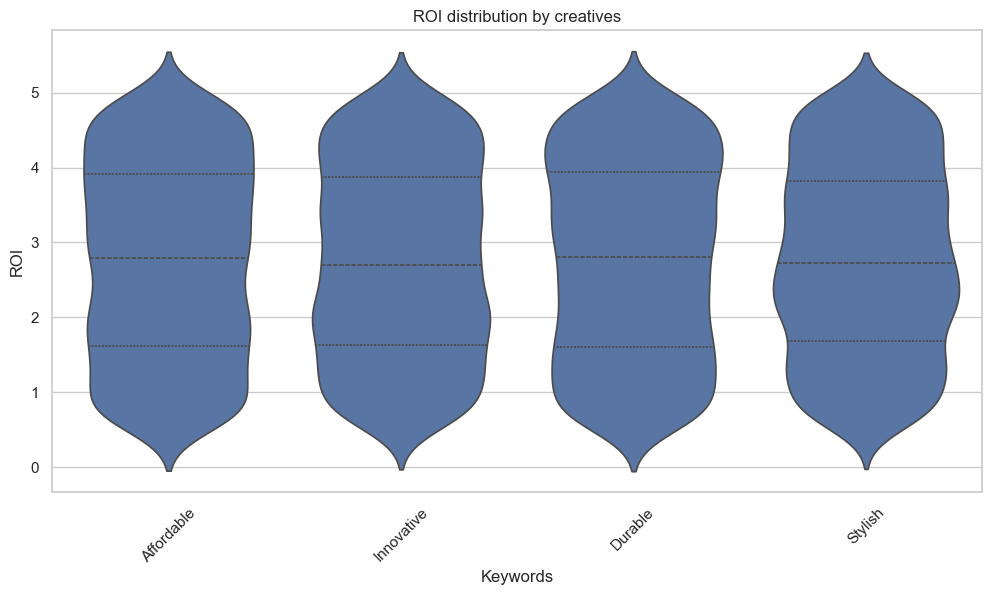

In [5]:
# 1. ROI distribution by creatives
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Common_Keywords", y="ROI", inner="quartile")
plt.title("ROI distribution by creatives")
plt.xticks(rotation=45)
plt.ylabel("ROI")
plt.xlabel("Keywords")
plt.show()

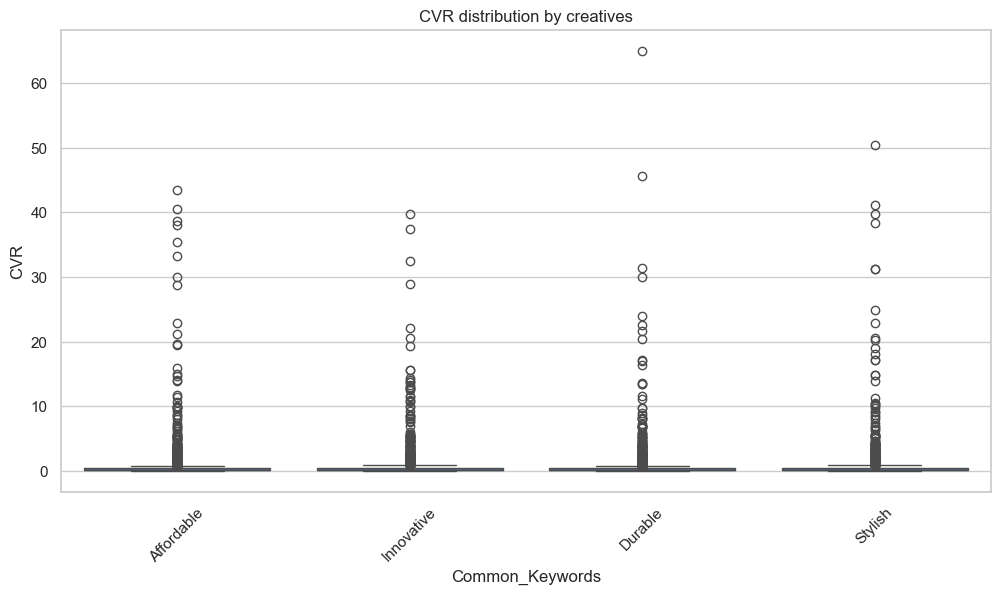

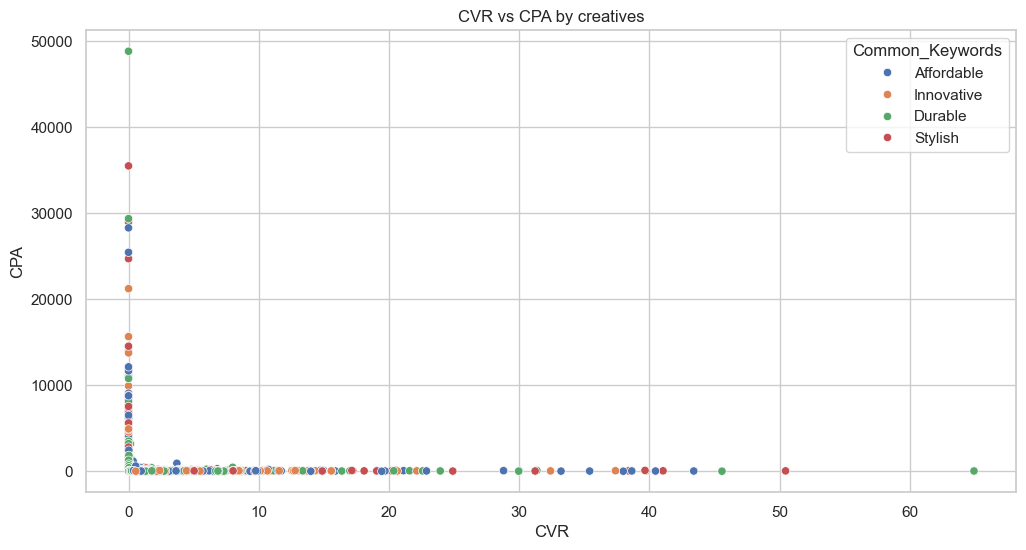

In [6]:
# 2.1 CVR distribution by creatives
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Common_Keywords", y="CVR")
plt.title("CVR distribution by creatives")
plt.ylabel("CVR")
plt.xticks(rotation=45)
plt.show()

# 2.2 CVR vs CPA by creatives
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="CVR", y="CPA", hue="Common_Keywords")
plt.title("CVR vs CPA by creatives")
plt.show()

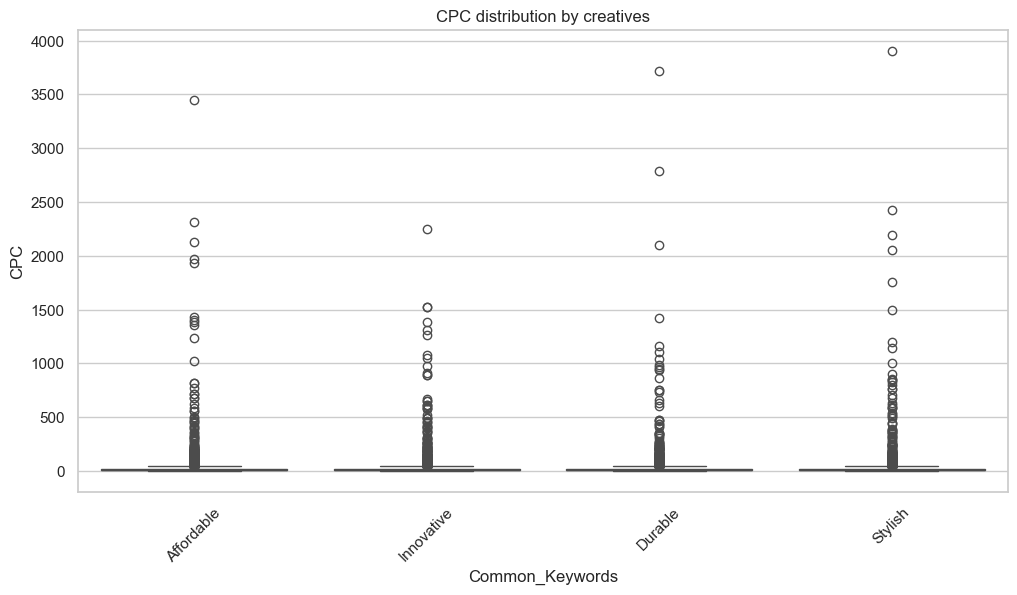

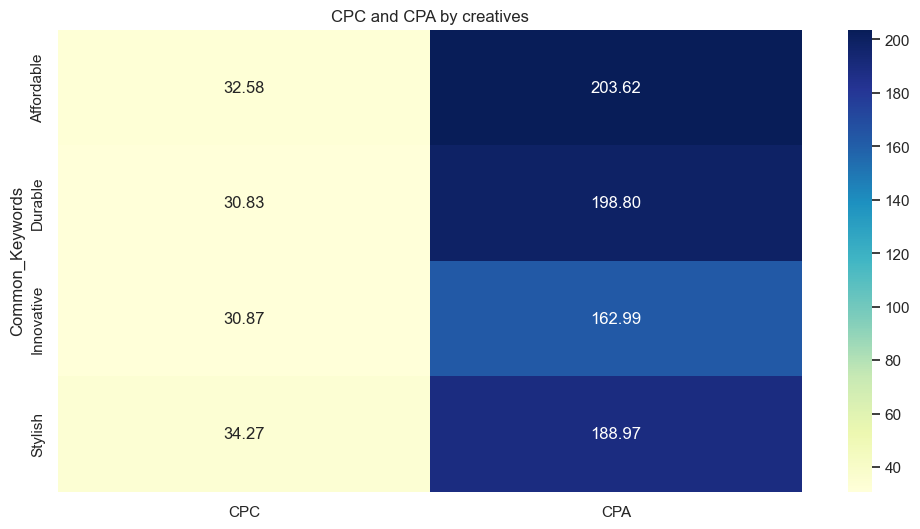

In [7]:
# 3.1 CPC distribution by creatives
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Common_Keywords", y="CPC")
plt.title("CPC distribution by creatives")
plt.ylabel("CPC")
plt.xticks(rotation=45)
plt.show()

# 3.2 CPC and CPA by creatives
plt.figure(figsize=(12, 6))
pivot = df.groupby("Common_Keywords")[["CPC", "CPA"]].mean()
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("CPC and CPA by creatives")
plt.show()

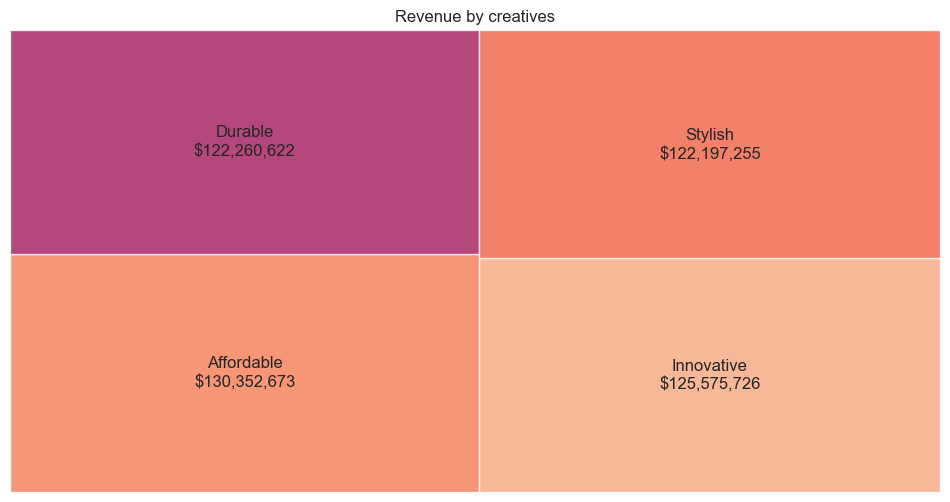

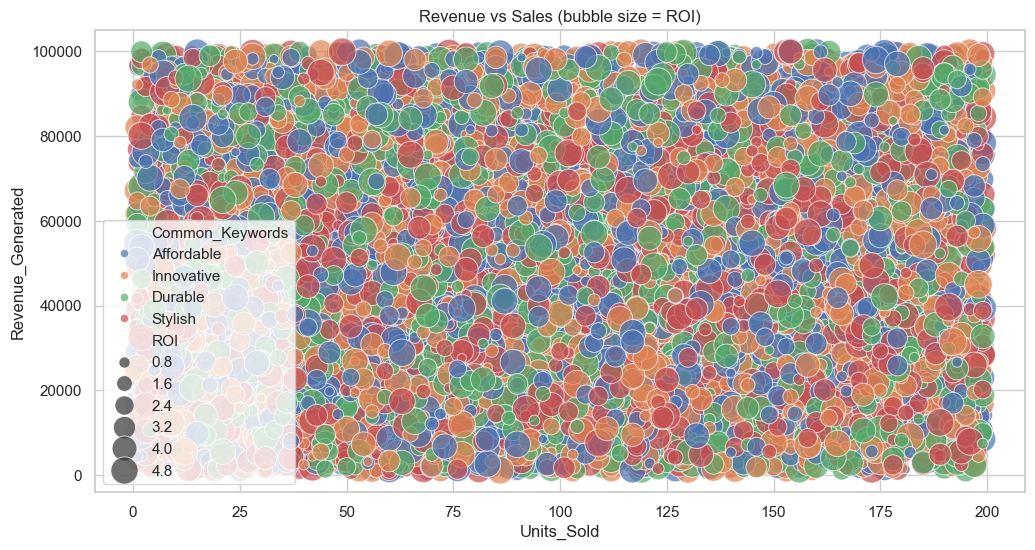

In [8]:
# 4.1 Revenue by creatives
import squarify
plt.figure(figsize=(12, 6))
revenue = df.groupby("Common_Keywords")["Revenue_Generated"].sum()
labels = [f"{k}\n${v:,.0f}" for k, v in revenue.items()]
squarify.plot(sizes=revenue.values, label=labels, alpha=0.8)
plt.title("Revenue by creatives")
plt.axis("off")
plt.show()

# 4.2 Revenue vs Sales, bubble size = ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Units_Sold", y="Revenue_Generated", size="ROI",hue="Common_Keywords", sizes=(40, 400), alpha=0.7)
plt.title("Revenue vs Sales (bubble size = ROI)")
plt.show()

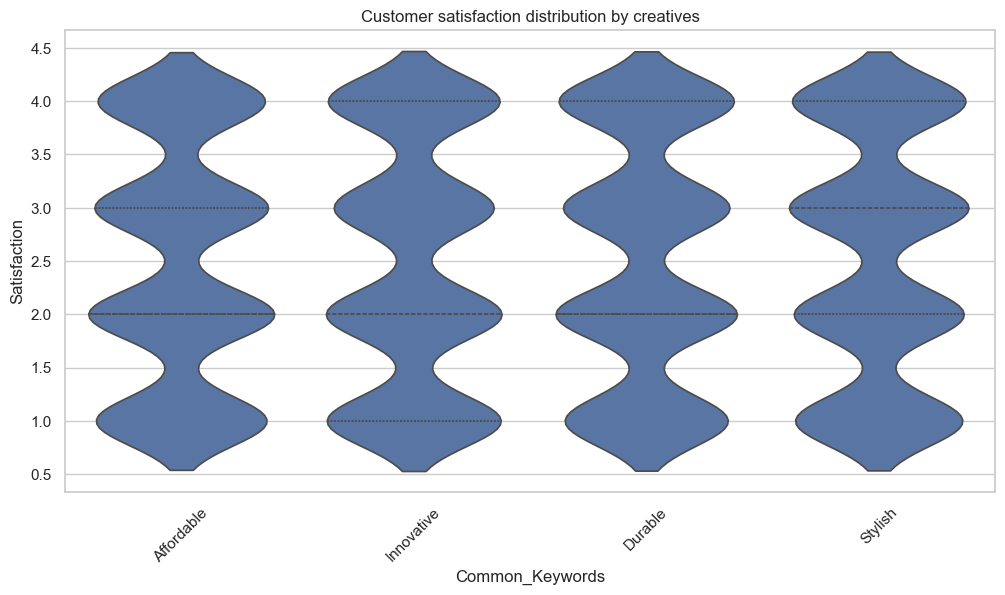

In [9]:
# 5 Customer satisfaction distribution by creatives
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Common_Keywords", y="Customer_Satisfaction_Post_Refund", inner="quartile")
plt.title("Customer satisfaction distribution by creatives")
plt.ylabel("Satisfaction")
plt.xticks(rotation=45)
plt.show()

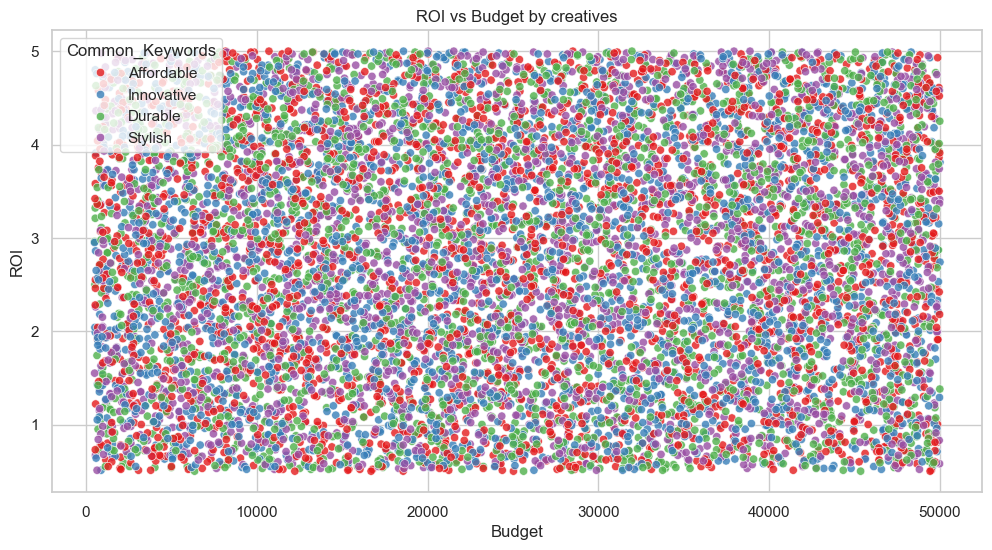

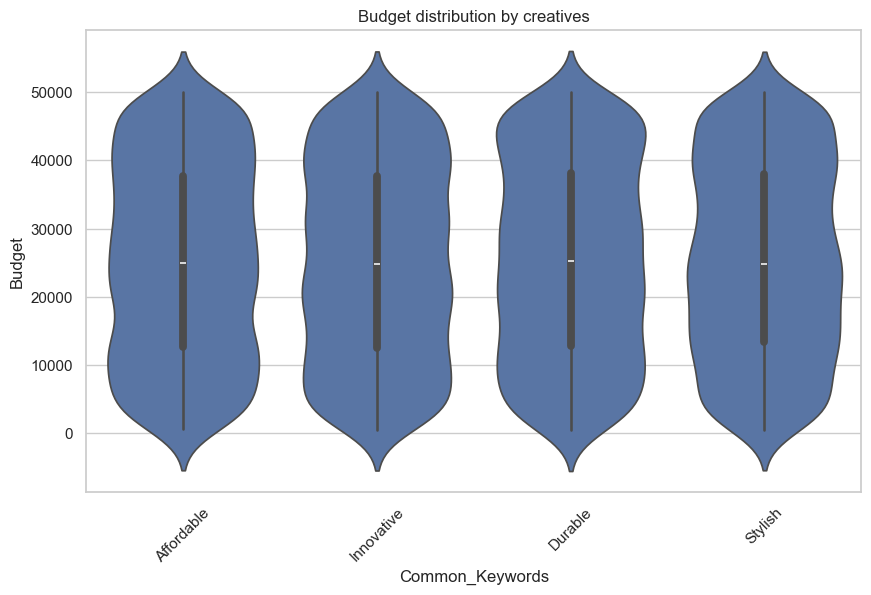

In [10]:
# 6.1 ROI vs Budget by creatives
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Budget", y="ROI", hue="Common_Keywords", palette="Set1", alpha=0.8)
plt.title("ROI vs Budget by creatives")
plt.show()

# 6.2 Budget distribution by creatives
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Common_Keywords", y="Budget")
plt.title("Budget distribution by creatives")
plt.ylabel("Budget")
plt.xticks(rotation=45)
plt.show()

Conversions prediction — R2: 0.997, RMSE: 16.216
First 10 actual values: [209 452 248 340 915 259 962  91 592 430]
First 10 predicted values: [209.46 454.76 260.45 360.77 906.28 256.92 945.76  92.38 593.62 444.71]


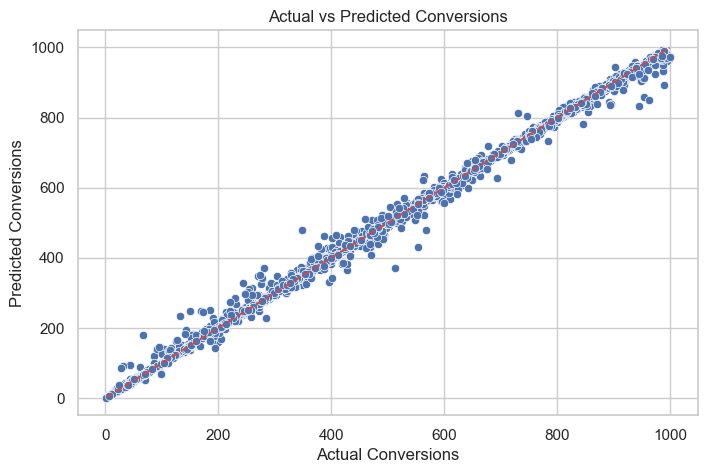

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data and predict conversions using Random Forest Regressor

# Define features and target variable
X = df[["Budget", "CPC", "CVR", "CPA"]]
y_conv = df["Conversions"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_conv, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics: RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Conversions prediction — R2: {r2:.3f}, RMSE: {rmse:.3f}")

# Display first 10 actual and predicted values
print("First 10 actual values:", y_test.head(10).values)
print("First 10 predicted values:", y_pred[:10])

# Plot actual vs predicted conversions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Conversions")
plt.ylabel("Predicted Conversions")
plt.title("Actual vs Predicted Conversions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal prediction line
plt.show()

Clicks prediction — R2: 0.997, RMSE: 85.572
First 10 actual values: [2510 3250 3535 3907 4047 1096 4426 3766 3130  336]
First 10 predicted values: [2494.56 3252.73 3567.37 3888.55 4028.17 1106.57 4419.31 3798.66 3077.01
  372.7 ]


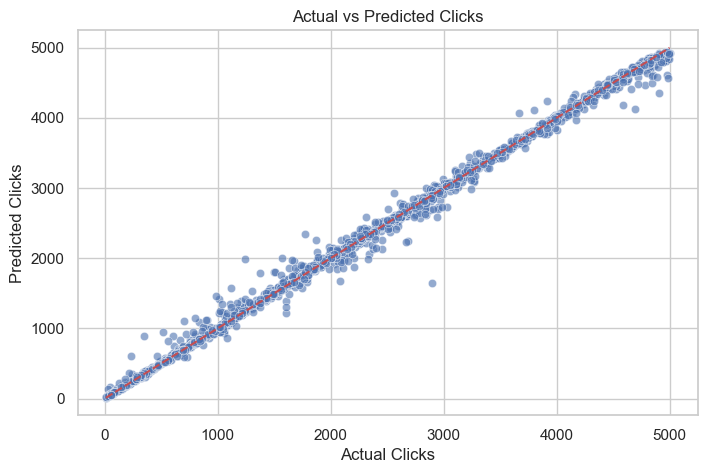

In [12]:
# Prediction for clicks using Random Forest Regressor

target = "Clicks"
X = df[["Budget", "CPC", "CVR", "CPA"]]
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics: RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Clicks prediction — R2: {r2:.3f}, RMSE: {rmse:.3f}")

# Display first 10 actual and predicted values
print("First 10 actual values:", y_test.head(10).values)
print("First 10 predicted values:", y_pred[:10])

# Visualization: actual vs predicted clicks
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Clicks")
plt.ylabel("Predicted Clicks")
plt.title("Actual vs Predicted Clicks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.show()

Avg_Check prediction — R2: 0.794, RMSE: 1001.944
First 10 actual values: [315.38191388 145.56449115 369.03056452 163.64126471  17.54998907
 248.47953668  93.64391892 492.9132967  103.56319257 110.79911628]
First 10 predicted values: [280.2795883  124.74865952 239.8177758  120.7812341   48.36415758
 216.20337007  48.80656609 445.58671305  61.34408371 137.12165176]


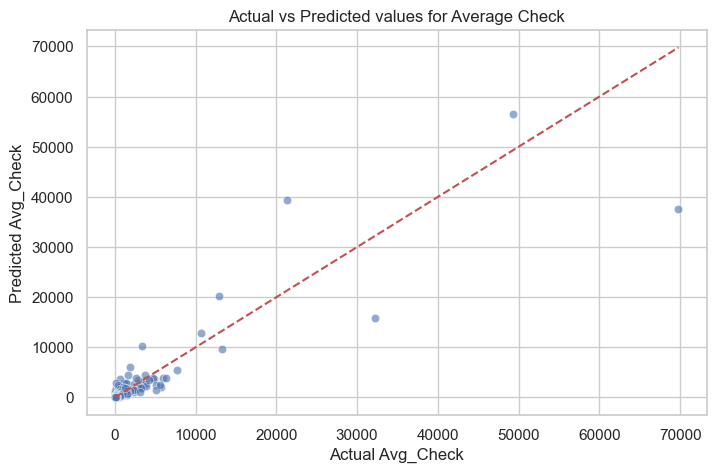

In [13]:
# Prediction for average check using Random Forest Regressor

# Create Avg_Check column
avg_check = df["Revenue_Generated"] / df["Conversions"].replace(0, np.nan)
avg_check = avg_check.fillna(avg_check.mean())
df = df.copy()  # make a safe copy
df["Avg_Check"] = avg_check

# Features and target variable
X = df[["Budget", "CPC", "CVR", "CPA"]]
y = df["Avg_Check"]

# Split data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics: RMSE and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Avg_Check prediction — R2: {r2:.3f}, RMSE: {rmse:.3f}")

# Display first 10 actual and predicted values
print("First 10 actual values:", y_test.head(10).values)
print("First 10 predicted values:", y_pred[:10])

# Visualization: actual vs predicted Avg_Check
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Avg_Check")
plt.ylabel("Predicted Avg_Check")
plt.title("Actual vs Predicted values for Average Check")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal prediction line
plt.show()